In [112]:
!pip install scikit-learn

In [113]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [114]:
df1=pd.read_csv("UsedCarsSA_Unclean_EN.csv")
df1

,Link,manufacturer,Type,Year,origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,odometer,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,Used,77000,Riyadh,75000,False
8244,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,Used,150000,Riyadh,53000,False
8245,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,NaN,Gas,Automatic,Used,260,Najran,Negotiable,True
8246,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,Used,18500,Aseer,22000,False


In [115]:
df1.columns

Index(['Link', 'manufacturer', 'Type', 'Year', 'origin', 'Color', 'Options',
       'Engine_Size', 'Fuel_Type', 'Gear_Type', 'Condition', 'odometer',
       'Region', 'Price', 'Negotiable'],
      dtype='object')

In [116]:
df2=df1.rename(columns={"Type":"Brand","odometer":"Mileage"})

In [117]:
df1.shape

(8248, 15)

In [118]:
df2.describe()

,Year,Engine_Size,Mileage
count,8248.000000,5982.000000,8.248000e+03
mean,2014.014064,3.175794,1.494128e+05
std,5.935349,1.567480,3.455258e+05
min,1936.000000,1.000000,1.000000e+02
25%,2012.000000,2.000000,3.700000e+04
50%,2016.000000,2.700000,1.016575e+05
75%,2018.000000,4.000000,1.955520e+05
max,2022.000000,9.000000,2.000000e+07


In [119]:
df2.head()

,Link,manufacturer,Brand,Year,origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False


In [120]:
df2=df2[["Year","Brand","Price","Mileage","Fuel_Type"]]
df2

,Year,Brand,Price,Mileage,Fuel_Type
0,2018,C300,114000,103000,Gas
1,2016,Patrol,Negotiable,5448,Gas
2,2019,Sunny,27500,72418,Gas
3,2019,Elantra,43000,114154,Gas
4,2019,Elantra,59500,41912,Gas
...,...,...,...,...,...
8243,2015,A6,75000,77000,Gas
8244,2010,Camaro,53000,150000,Gas
8245,2013,Land Cruiser,Negotiable,260,Gas
8246,2011,Altima,22000,18500,Gas


In [121]:
df2.isna().count()

Year         8248
Brand        8248
Price        8248
Mileage      8248
Fuel_Type    8248
dtype: int64

In [122]:
dftest=df2[df2["Price"].str.isnumeric()]
dftest

,Year,Brand,Price,Mileage,Fuel_Type
0,2018,C300,114000,103000,Gas
2,2019,Sunny,27500,72418,Gas
3,2019,Elantra,43000,114154,Gas
4,2019,Elantra,59500,41912,Gas
5,2018,Accord,72000,39000,Gas
...,...,...,...,...,...
8242,2006,Sorento,15000,257000,Gas
8243,2015,A6,75000,77000,Gas
8244,2010,Camaro,53000,150000,Gas
8246,2011,Altima,22000,18500,Gas


In [123]:
dftest.isnull().values.any() #no Null Values it seems.

False

In [124]:
dftest.dtypes

Year          int64
Brand        object
Price        object
Mileage       int64
Fuel_Type    object
dtype: object

In [125]:
df=dftest

In [126]:
df

,Year,Brand,Price,Mileage,Fuel_Type
0,2018,C300,114000,103000,Gas
2,2019,Sunny,27500,72418,Gas
3,2019,Elantra,43000,114154,Gas
4,2019,Elantra,59500,41912,Gas
5,2018,Accord,72000,39000,Gas
...,...,...,...,...,...
8242,2006,Sorento,15000,257000,Gas
8243,2015,A6,75000,77000,Gas
8244,2010,Camaro,53000,150000,Gas
8246,2011,Altima,22000,18500,Gas


In [127]:
df99=df['Price'].astype(str).astype(int)

In [128]:
df99

0       114000
2        27500
3        43000
4        59500
5        72000
         ...  
8242     15000
8243     75000
8244     53000
8246     22000
8247     40000
Name: Price, Length: 5652, dtype: int32

In [129]:
df

,Year,Brand,Price,Mileage,Fuel_Type
0,2018,C300,114000,103000,Gas
2,2019,Sunny,27500,72418,Gas
3,2019,Elantra,43000,114154,Gas
4,2019,Elantra,59500,41912,Gas
5,2018,Accord,72000,39000,Gas
...,...,...,...,...,...
8242,2006,Sorento,15000,257000,Gas
8243,2015,A6,75000,77000,Gas
8244,2010,Camaro,53000,150000,Gas
8246,2011,Altima,22000,18500,Gas


In [130]:
df.dtypes

Year          int64
Brand        object
Price        object
Mileage       int64
Fuel_Type    object
dtype: object

In [131]:
df_merged=df

In [132]:
df_merged

,Year,Brand,Price,Mileage,Fuel_Type
0,2018,C300,114000,103000,Gas
2,2019,Sunny,27500,72418,Gas
3,2019,Elantra,43000,114154,Gas
4,2019,Elantra,59500,41912,Gas
5,2018,Accord,72000,39000,Gas
...,...,...,...,...,...
8242,2006,Sorento,15000,257000,Gas
8243,2015,A6,75000,77000,Gas
8244,2010,Camaro,53000,150000,Gas
8246,2011,Altima,22000,18500,Gas


In [133]:
df_dropped=df_merged.drop(columns='Price')
df_dropped

,Year,Brand,Mileage,Fuel_Type
0,2018,C300,103000,Gas
2,2019,Sunny,72418,Gas
3,2019,Elantra,114154,Gas
4,2019,Elantra,41912,Gas
5,2018,Accord,39000,Gas
...,...,...,...,...
8242,2006,Sorento,257000,Gas
8243,2015,A6,77000,Gas
8244,2010,Camaro,150000,Gas
8246,2011,Altima,18500,Gas


In [134]:
result = pd.concat([df_dropped, df99], axis=1, join="inner")

In [135]:
result

,Year,Brand,Mileage,Fuel_Type,Price
0,2018,C300,103000,Gas,114000
2,2019,Sunny,72418,Gas,27500
3,2019,Elantra,114154,Gas,43000
4,2019,Elantra,41912,Gas,59500
5,2018,Accord,39000,Gas,72000
...,...,...,...,...,...
8242,2006,Sorento,257000,Gas,15000
8243,2015,A6,77000,Gas,75000
8244,2010,Camaro,150000,Gas,53000
8246,2011,Altima,18500,Gas,22000


In [136]:
result.dtypes

Year          int64
Brand        object
Mileage       int64
Fuel_Type    object
Price         int32
dtype: object

In [137]:
df3=result

In [138]:
# Assuming df3 is your DataFrame
top_10_prices = df3['Mileage'].nlargest(10)

# Display the top 10 prices
print(top_10_prices)

7590    20000000
7728     4500000
6789     4430000
6441     3640000
2796     3500000
4676     3500000
814      3300000
817      3300000
929      3180003
713      3150000
Name: Mileage, dtype: int64


In [139]:
# Example: Remove rows where Mileage is equal to 20,000,000
df3 = df3[df3['Mileage'] != 20000000]

In [140]:
df3.describe()

,Year,Mileage,Price
count,5651.000000,5.651000e+03,5.651000e+03
mean,2014.789241,1.365938e+05,7.854890e+04
std,5.220585,2.044150e+05,7.607484e+04
min,1963.000000,1.000000e+02,0.000000e+00
25%,2013.000000,4.646400e+04,3.500000e+04
50%,2016.000000,1.010000e+05,5.800000e+04
75%,2018.000000,1.810000e+05,9.500000e+04
max,2021.000000,4.500000e+06,1.150000e+06


In [141]:
df3["Mileage"].isnull().values.any()


False

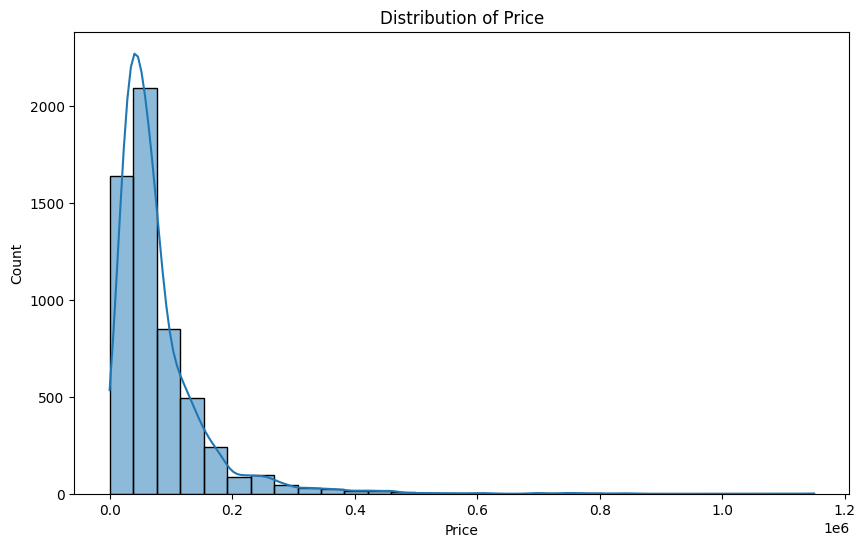

In [142]:
# Univariate Analysis - Distribution of 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(df3['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.show()


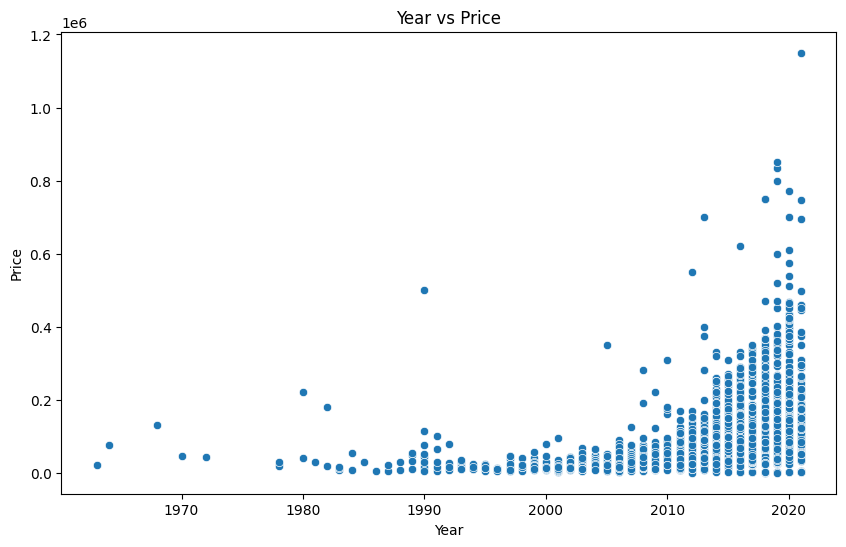

In [143]:
# Bivariate Analysis - Scatter plot of 'Year' vs 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', data=df3)
plt.title('Year vs Price')
plt.show()


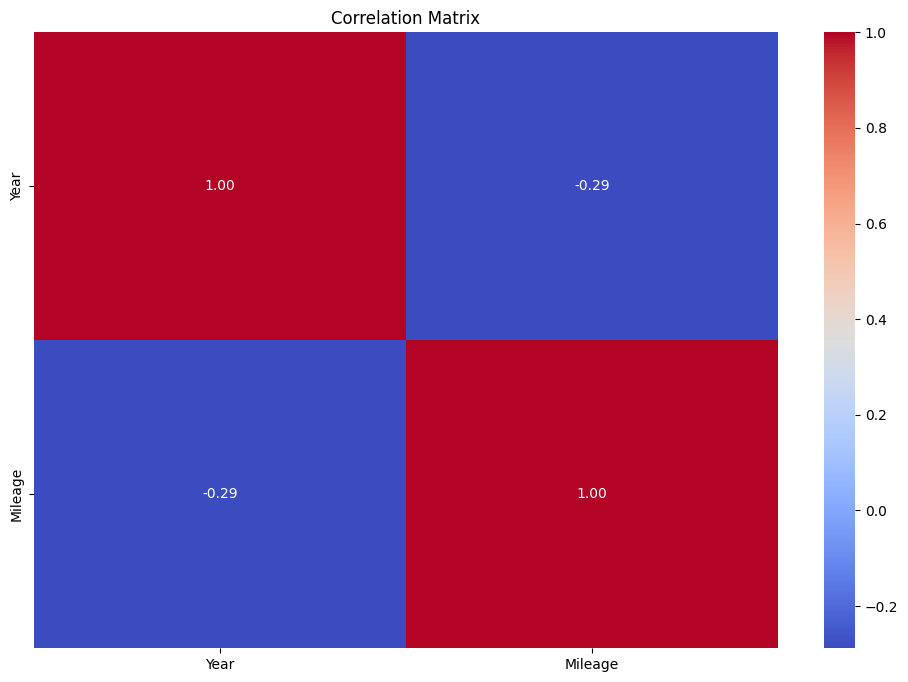

In [144]:
numerical_columns = df3.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df3[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [145]:
# Extract features and target
X = df3[['Year', 'Mileage', 'Brand', 'Fuel_Type']]
y = df3['Price']

# Split the dataset into a training set and a testing set (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [146]:
# Create a column transformer for one-hot encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(handle_unknown='ignore'), ['Brand', 'Fuel_Type'])
    ],
    remainder='passthrough'
)



In [147]:

# Combine preprocessor and linear regression model into a pipeline
model = LinearRegression()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model on the training set
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Brand', 'Fuel_Type'])])),
                ('model', LinearRegression())])

In [148]:
# Predictions on the testing set
y_pred = pipeline.predict(X_test)

# Compare actual and predicted values
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head())


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


      Actual      Predicted
4156   75000  108336.802420
1112   65000   85037.316077
4909   27000   81638.063734
5754   40000   35753.962202
2955   18000  -49936.524474
Mean Absolute Error: 44788.52347708792
Root Mean Squared Error: 67428.54081256087
R-squared: 0.11030343909931084


In [149]:
# Accessing coefficients
coefficients = pipeline.named_steps['model'].coef_

# Displaying coefficients with corresponding feature names
feature_names = list(X_train.columns) + list(pipeline.named_steps['preprocessor'].named_transformers_['categorical'].get_feature_names_out(['Brand', 'Fuel_Type']))
coefficients_dict = dict(zip(feature_names, coefficients))

print("\nCoefficients:")
for feature, coef in coefficients_dict.items():
    print(f"{feature}: {coef:.2f}")



Coefficients:
Year: -0.63
Mileage: -5.37
Brand: -0.25
Fuel_Type: -0.49
Brand_2: -2.23
Brand_3: -0.63
Brand_300: -0.50
Brand_3008: -0.50
Brand_301: -0.56
Brand_307: -0.95
Brand_308: 0.14
Brand_323: -2.40
Brand_350: -0.46
Brand_360: -0.00
Brand_4Runner: -10.60
Brand_5: 4.08
Brand_500: 5.19
Brand_5008: -0.09
Brand_6: -0.40
Brand_911: 0.30
Brand_A: 1.38
Brand_A3: 7.85
Brand_A4: -1.22
Brand_A5: -0.17
Brand_A6: 0.29
Brand_A8: -0.65
Brand_APV: -1.98
Brand_ASX: -76.05
Brand_ATS: -8.35
Brand_Abeka: 0.74
Brand_Acadia: -8.52
Brand_Accent: -1.29
Brand_Accord: 6.09
Brand_Actros: -3.66
Brand_Altima: -0.99
Brand_Armada: -0.57
Brand_Arnage: 1.12
Brand_Attrage: -0.18
Brand_Aurion: -2.01
Brand_Avalanche: -2.27
Brand_Avalon: -7.04
Brand_Avante: -0.17
Brand_Avanza: -0.50
Brand_Aveo: -1.36
Brand_Azera: -0.45
Brand_Azkarra: -0.29
Brand_B50: 18.58
Brand_BT-50: -4.61
Brand_Beetle: -0.41
Brand_Behbehani: -0.28
Brand_Bentayga: -0.16
Brand_Blazer: 0.17
Brand_Bonneville: -1.73
Brand_Boxer: 25.93
Brand_Bus: 0.03
